This notebook contains an analysis of the land use attribute in the property assessment dataset

the earliest data is from 2004 and the latest data is from 2024

the data is in 5 year intervals. note, there was no data availible for 2014, so data from 2015 was chosen, as it had more data points than 2013

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_53116/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [40]:
# grab required data

pa_2004 = pd.read_csv('../data/property_assessment_2004.csv')[['PID', 'LU']]
pa_2009 = pd.read_csv('../data/property_assessment_2009.csv')[['PID', 'LU']]
pa_2015 = pd.read_csv('../data/property_assessment_2015.csv')[['PID', 'LU']]
pa_2019 = pd.read_csv('../data/property_assessment_2019.csv')[['PID', 'LU']]
pa_2024 = pd.read_csv('../data/property_assessment_2024.csv')[['PID', 'LU']]

/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_53116/2767882949.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2004 = pd.read_csv('../data/property_assessment_2004.csv')[['PID', 'LU']]
/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_53116/2767882949.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2009 = pd.read_csv('../data/property_assessment_2009.csv')[['PID', 'LU']]
/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_53116/2767882949.py:6: DtypeWarning: Columns (16,61) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2019 = pd.read_csv('../data/property_assessment_2019.csv')[['PID', 'LU']]
/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_53116/2767882949.py:7: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2024 = pd.read_csv('../

In [41]:
# check that dataframes have correct values

print(pa_2004.head())
print(pa_2009.head())
print(pa_2015.head())
print(pa_2019.head())
print(pa_2024.head())

         PID  LU
0  100043000  R3
1  100044000  R3
2  100045000  R3
3  100046000  R2
4  100047000  R3
         PID  LU
0  100001000  R3
1  100002000  R3
2  100003000  R3
3  100004000  R3
4  100005000  R2
           PID  LU
0  1302299000_  R3
1  1302298000_  R2
2  1302297000_  R2
3  1302296000_  R2
4  1302295000_  R2
         PID  LU
0  502550008  CD
1  502550010  CD
2  502550012  CD
3  502550014  CD
4  502550016  CD
         PID  LU
0  100001000  R3
1  100002000  R3
2  100003000  R3
3  100004000  R3
4  100005000  R2


<Axes: xlabel='LU'>

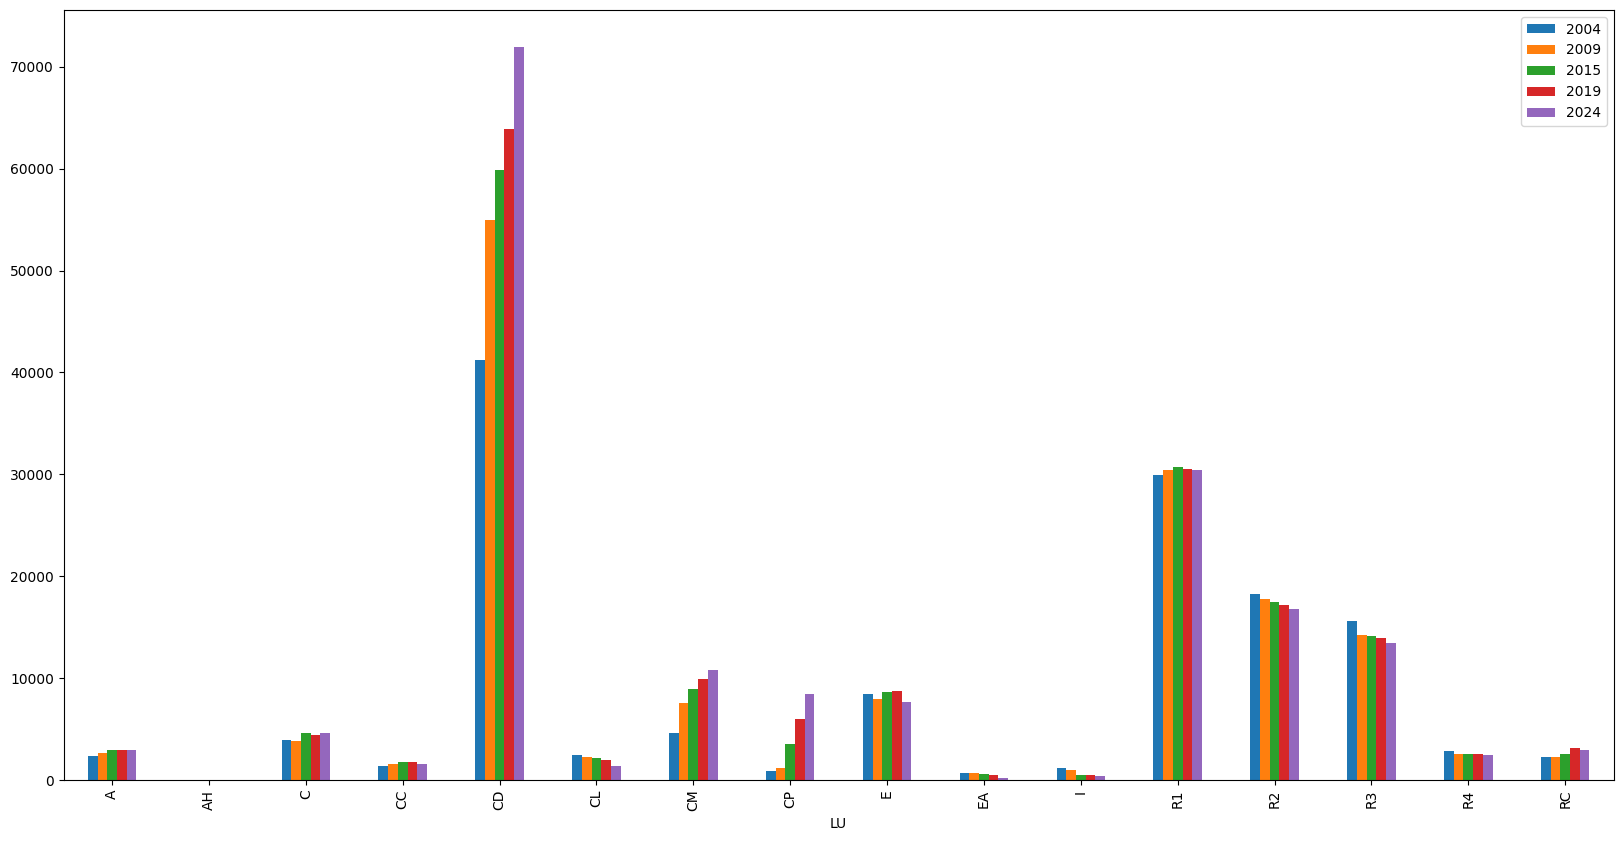

In [60]:
# fig, axes = plt.subplots(figsize=(20,6), layout='constrained')

group_04 = pa_2004.groupby('LU').count().rename(columns={'PID': '2004'})
group_09 = pa_2009.groupby('LU').count().rename(columns={'PID': '2009'})
group_15 = pa_2015.groupby('LU').count().rename(columns={'PID': '2015'})
group_19 = pa_2019.groupby('LU').count().rename(columns={'PID': '2019'})
group_24 = pa_2024.groupby('LU').count().rename(columns={'PID': '2024'})

bar_graph = pd.merge(group_04, group_09, on='LU')
bar_graph = pd.merge(bar_graph, group_15, on='LU')
bar_graph = pd.merge(bar_graph, group_19, on='LU')
bar_graph = pd.merge(bar_graph, group_24, on='LU')

bar_graph.plot(kind='bar', figsize=(20,10))
